import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import xgboost as xgb

In [215]:
# Loading the data frames by pandas library

calories=pd.read_csv("calories.csv")
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [216]:
exercizes=pd.read_csv("excercizes.csv")
exercizes.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


In [218]:


# Combining two different dataframes
exercises_data = pd.read_csv("excercizes.csv")

calories_data = pd.concat([exercises_data,calories["Calories"]], axis=1)
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193,86,11,92,40.4,45.0
14996,17212577,female,27,165,65,6,85,39.2,23.0
14997,17271188,female,43,159,58,16,90,40.1,75.0
14998,18643037,male,78,193,97,2,84,38.3,11.0


Checking the number of rows and columns

In [221]:
calories_data.shape

(15000, 9)

Getting some information pertinent to the data.

In [225]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [226]:
#Checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [239]:
# Getting some stastical measures related to data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualization

In [242]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

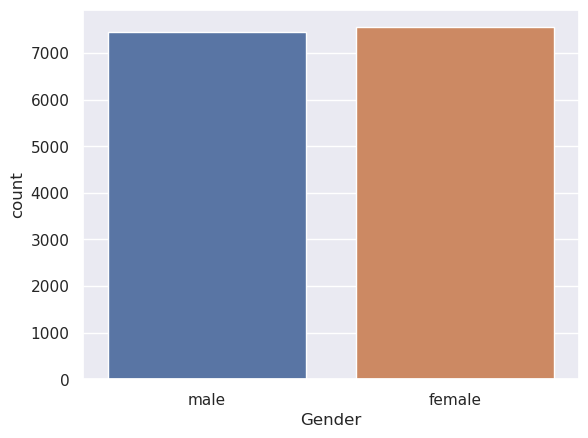

In [244]:
#Plotting the gender column in count plot
sns.countplot(data=calories_data,x="Gender")

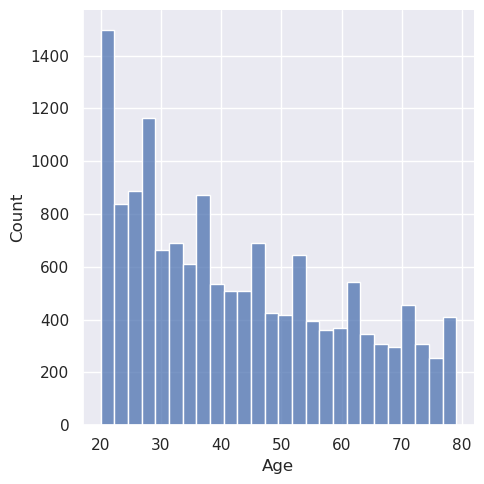

In [245]:
# Finding the distribution of age column
sns.displot(calories_data["Age"])

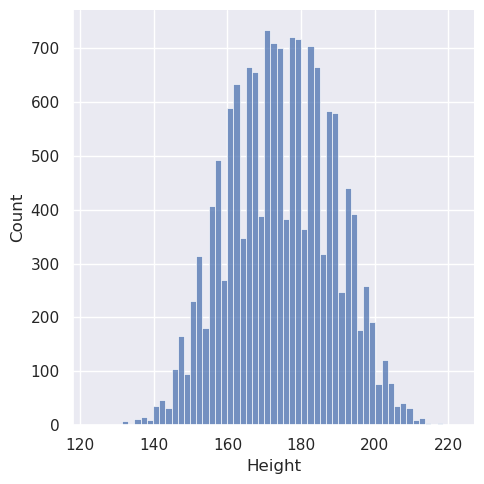

In [248]:
sns.displot(calories_data["Height"])

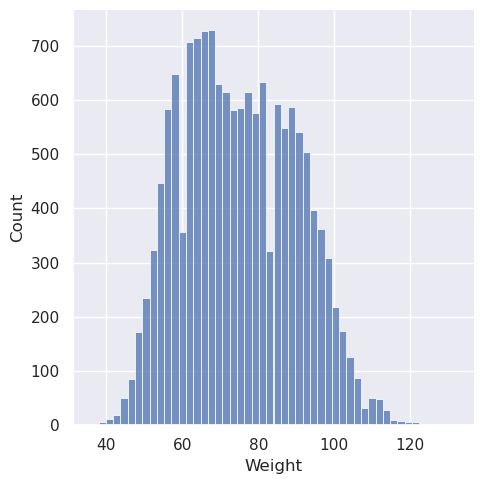

In [249]:
sns.displot(calories_data["Weight"])

Corelation are of two types
1. Positive corelation
2. Negative corelation


/tmp/ipykernel_175/2651163925.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation=calories_data.corr()


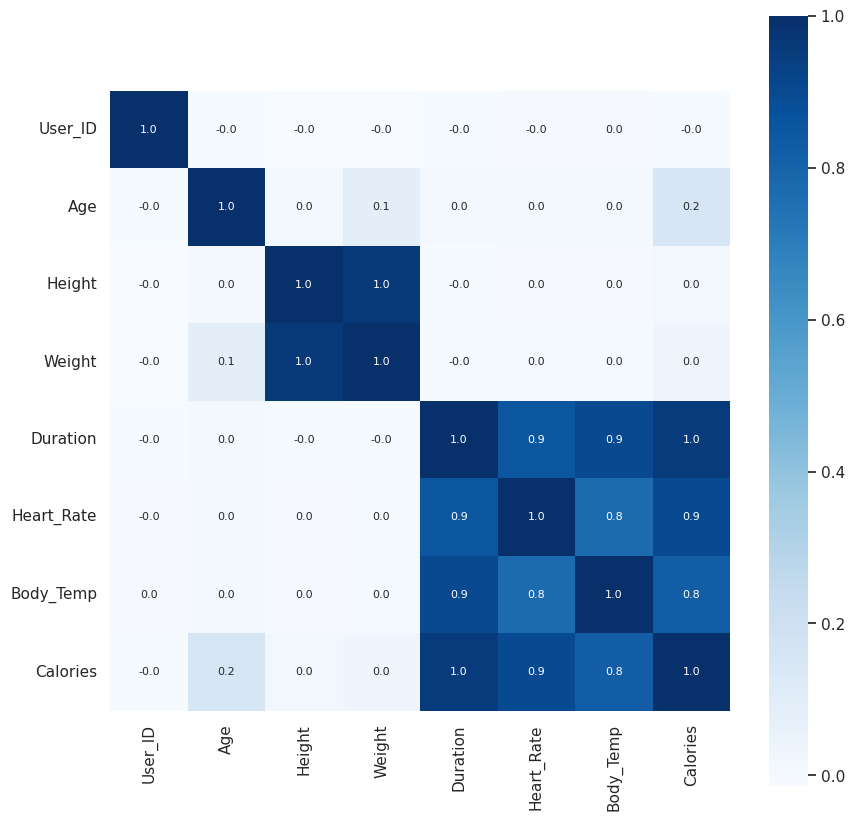

In [253]:

# Constructing a heatmap to understand the correlation
corelation=calories_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

Converting the text data into numerical values.
It is formally reffered to as Categorical Data Encoding

In [255]:
calories_data.replace({"Gender":{'male':0,'female':1}},inplace=True)

In [256]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231.0
1,14861698,1,20,166,60,14,94,40.3,66.0
2,11179863,0,69,179,79,5,88,38.7,26.0
3,16180408,1,34,179,71,13,100,40.5,71.0
4,17771927,1,27,154,58,10,81,39.8,35.0


Seperating features and target

In [261]:
X=calories_data.drop(columns=["User_ID","Calories"],axis=1)
Y=calories_data["Calories"]

In [263]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68     190      94        29         105       40.8
1           1   20     166      60        14          94       40.3
2           0   69     179      79         5          88       38.7
3           1   34     179      71        13         100       40.5
4           1   27     154      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20     193      86        11          92       40.4
14996       1   27     165      65         6          85       39.2
14997       1   43     159      58        16          90       40.1
14998       0   78     193      97         2          84       38.3
14999       0   63     173      79        18          92       40.5

[15000 rows x 7 columns]


In [265]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [294]:
# Splitting our data into training and test data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [296]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (13500, 7) (1500, 7)


Training Model

Implementation of XGB boost regressor

In [300]:
# Loading the model
model=xgb.XGBClassifier()

In [302]:
# Convert Y_train to have classes represented by consecutive integers starting from 0
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Training the model with X_train
model.fit(X_train, Y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Evaluating The Model

Predicting on Test Data

In [305]:
test_data_prediction=model.predict(X_test)

In [306]:
print(test_data_prediction)

[125 219  35 ...  53  66 178]


Metric used in this case to evaluate the quality of predictions rendered by the model is Mean Absolute Error

In [308]:
mae=metrics.mean_absolute_error(Y_test,test_data_prediction)

In [309]:
print(" Mean Absolute Error: " , mae)

 Mean Absolute Error:  5.288666666666667


Building a predictive system

In [329]:
input_data=(0,46,169.0,67.0,11.0,89.0,40.2)
input_data1=(1,47,155.0,55.0,16.0,93.0,40.5)
# Changing the input data into numpy array

input_data_as_numpyarray=np.asarray(input_data)
input_data_as_numpyarray1=np.asarray(input_data1)


#reshaping the array

input_data_reshaped=input_data_as_numpyarray.reshape(1,-1)
input_data_reshaped1=input_data_as_numpyarray1.reshape(1,-1)


prediction=model.predict(input_data_reshaped)
prediction1=model.predict(input_data_reshaped1)

In [333]:
print(prediction1)
print(prediction)

[81]
[42]


Saving the trained model

In [349]:
import pickle
filename="trained_model.sav"
pickle.dump(model,open(filename,"wb"))

In [355]:
# Loading the saved model

loaded_model=pickle.load(open("trained_model.sav","rb"))